In [41]:
import ldd
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy, umath

def largeur(wavelength, D, a):
    return 2 * wavelength * D / a

def uncertainties_to_latex(array):
    string = ""

    for line in array:
        for val in line:
            string += f"${val.nominal_value:.3f} \pm {val.std_dev:.3f}$ &"
            
        string += "\\\\ \n"
        
    print(string)

In [42]:

"""
    Influence de la largeur de la fente
"""

D_1 = ufloat(75.5, std_dev=0.8) * 10**(-2)
lambda_1 = ufloat(532, std_dev=10) * 10**(-9)
a_1 = unumpy.uarray([80, 200, 150, 100, 80, 60, 40], std_devs=1) * 10**(-6)

L_mesure_1 = unumpy.uarray([1.05, 0.4, 0.55, 0.75, 1.05, 1.35, 2.1], std_devs=0.05) * 10**(-2)
L_th_1 = largeur(lambda_1, D_1, a_1)

string = ""

for val in a_1:
    string += f"${val.nominal_value:.3f} \pm {val.std_dev:.3f}$ & ${lambda_1.nominal_value}$ & $$ & $$"
    
string += "\\\\ \n"
        
print(string)


In [43]:
"""
    Influence de la longueur d'onde
"""

D_2 = ufloat(75.5, std_dev=0.8) * 10**(-2)
lambda_2 = unumpy.uarray([532, 650, 450], std_devs=10) * 10**(-9)
a_2 = ufloat(80, std_dev=1) * 10**(-6)

L_mesure_2 = unumpy.uarray([1, 1.2, 0.75], std_devs=0.05) * 10**(-2)
L_th_2 = largeur(lambda_2, D_2, a_2)

In [44]:
"""
    Influence de la distance ecran-fente
"""

D_3 =  unumpy.uarray([75.5, 65.5, 55, 45.2, 35.2, 25, 15], std_devs=0.8) * 10**(-2)
lambda_3 = ufloat(532, std_dev=10) * 10**(-9)
a_3 = ufloat(40, std_dev=1) * 10**(-6)

L_mesure_3 = unumpy.uarray([2, 1.75, 1.45, 1.25, 0.95, 0.6, 0.35], std_devs=0.1) * 10**(-2)
L_th_3 = largeur(lambda_3, D_3, a_3)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


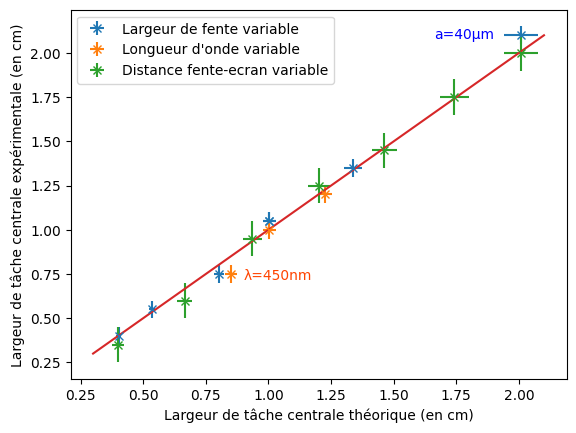

In [103]:

"""
    Calcul et synthèse des différents résultats
"""

x = np.linspace(0.3, 2.1, 5)

ldd.plot_error(L_th_1 * 10**2, L_mesure_1 * 10**2, label="Largeur de fente variable", fmt="x")
ldd.plot_error(L_th_2 * 10**2, L_mesure_2 * 10**2, label="Longueur d'onde variable", fmt="x")
ldd.plot_error(L_th_3 * 10**2, L_mesure_3 * 10**2, label="Distance fente-ecran variable", fmt="x")
plt.plot(x, x)
plt.text(1.9, 2.08, 'a=40µm', horizontalalignment='right', color="blue")
plt.text(L_th_2[2].nominal_value * 10**2 + 0.05,L_mesure_2[2].nominal_value * 10 ** 2 - 0.03,'λ=450nm', color="#ff4400")

plt.xlabel("Largeur de tâche centrale théorique (en cm)")
plt.ylabel("Largeur de tâche centrale expérimentale (en cm)")
plt.legend()
# plt.show()
plt.savefig("graph_final_diffrac_simple.eps")


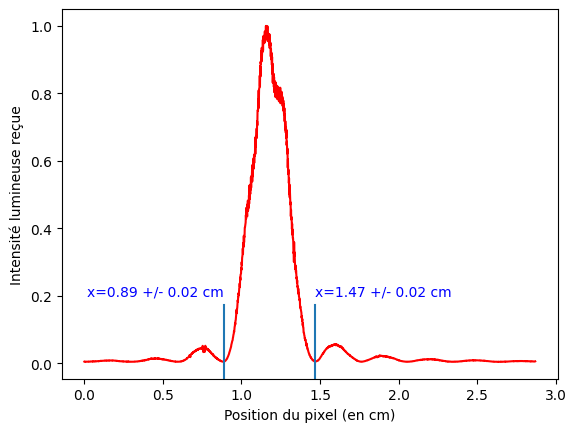

In [108]:
"""
    Caméra linéaire
"""
import numpy as np
import pandas as pd

df = pd.read_csv("cam_lineaire.csv", delimiter=";")

pixel = df.iloc[:,0].values
intensity = df.iloc[:,1].values

pixel *= 14 * 10**(-4)

plt.plot(pixel, intensity, color="red")
plt.ylabel("Intensité lumineuse reçue")
plt.xlabel("Position du pixel (en cm)")
plt.axvline(0.0089 * 10**(2), ymin = 0, ymax=0.2)
plt.axvline(0.0147 * 10**(2), ymin = 0, ymax=0.2)
plt.text(0.0089 * 10**(2), 0.2, f"x={0.0089 * 10**(2)} +/- 0.02 cm", horizontalalignment='right', color="b")
plt.text(0.0147 * 10**(2), 0.2, f"x={0.0147 * 10**(2)} +/- 0.02 cm", color="b")
plt.savefig("graphe_camera_lineaire.eps")

In [102]:
L = ufloat(0.58, 0.04) * 10**(-2)
lambd = ufloat(532, 10) * 10**(-9)
D = ufloat(81.5, 0.5) * 10**(-2)

print((2 * lambd * D / L) * 10**(6))

150+/-11


In [105]:
d = ufloat(77.4, 0.5) * 10**(-2)
lambd = ufloat(532, 10) * 10**(-9)
L = unumpy.uarray([1.5, 0.75], 0.05) * 10**(-2)

print((2 * d * lambd / L) * 10**(6))

[54.90240000000001+/-2.1307288074375976
 109.80480000000001+/-7.638739076587038]


In [107]:
D = ufloat(79, 0.8) * 10**(-2)
l = ufloat(1.3, 0.1) * 10**(-2)
L = ufloat(0.4, 0.05) * 10**(-2)

print((2 * lambd * D / l) * 10**6)
print((2 * lambd * D / L) * 10**6)

65+/-5
210+/-27
